# Tensorflow 
## ANN | Batch Normalization | Regularization |Dropout | Keras Tuner (Hyper parameter tuning ) | Callbacks | Weight Initialization |  Transfer Learning 

##  (01) ANN for handwritten digit classification 

In [1]:
import tensorflow as tf
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
### importing data and create the initial setup 

mnist = tf.keras.datasets.mnist
(X_train_full , y_train_full ) , (X_test , y_test) = mnist.load_data()
print(X_train_full.shape) ###### 60000 images of 28*28 
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


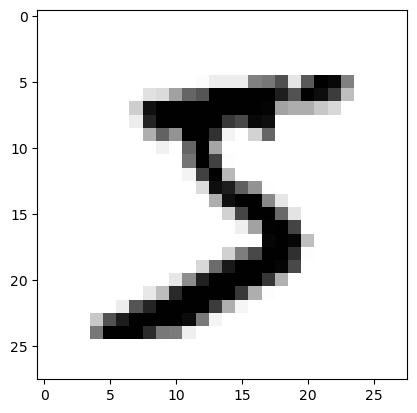

In [8]:
img = X_train_full[0]
plt.imshow(img ,cmap='binary')

'\nThe pixel values of an image typically range from 0 to 255, where 0 represents black and 255 \nrepresents white (for grayscale images). For color images, each channel (red, green, blue) also ranges from 0 to 255.\n\nThe expression img/255 is typically used to normalize the pixel values of an image to the \nrange [0, 1]. This normalization is often performed before feeding the image data into machine \nlearning models or when visualizing images with libraries like Seaborn or Matplotlib.\n\nNormalizing the pixel values to the range [0, 1] can help improve the convergence of machine \nlearning algorithms and ensures that the features have similar scales, which can lead to better\nperformance.\n\n'

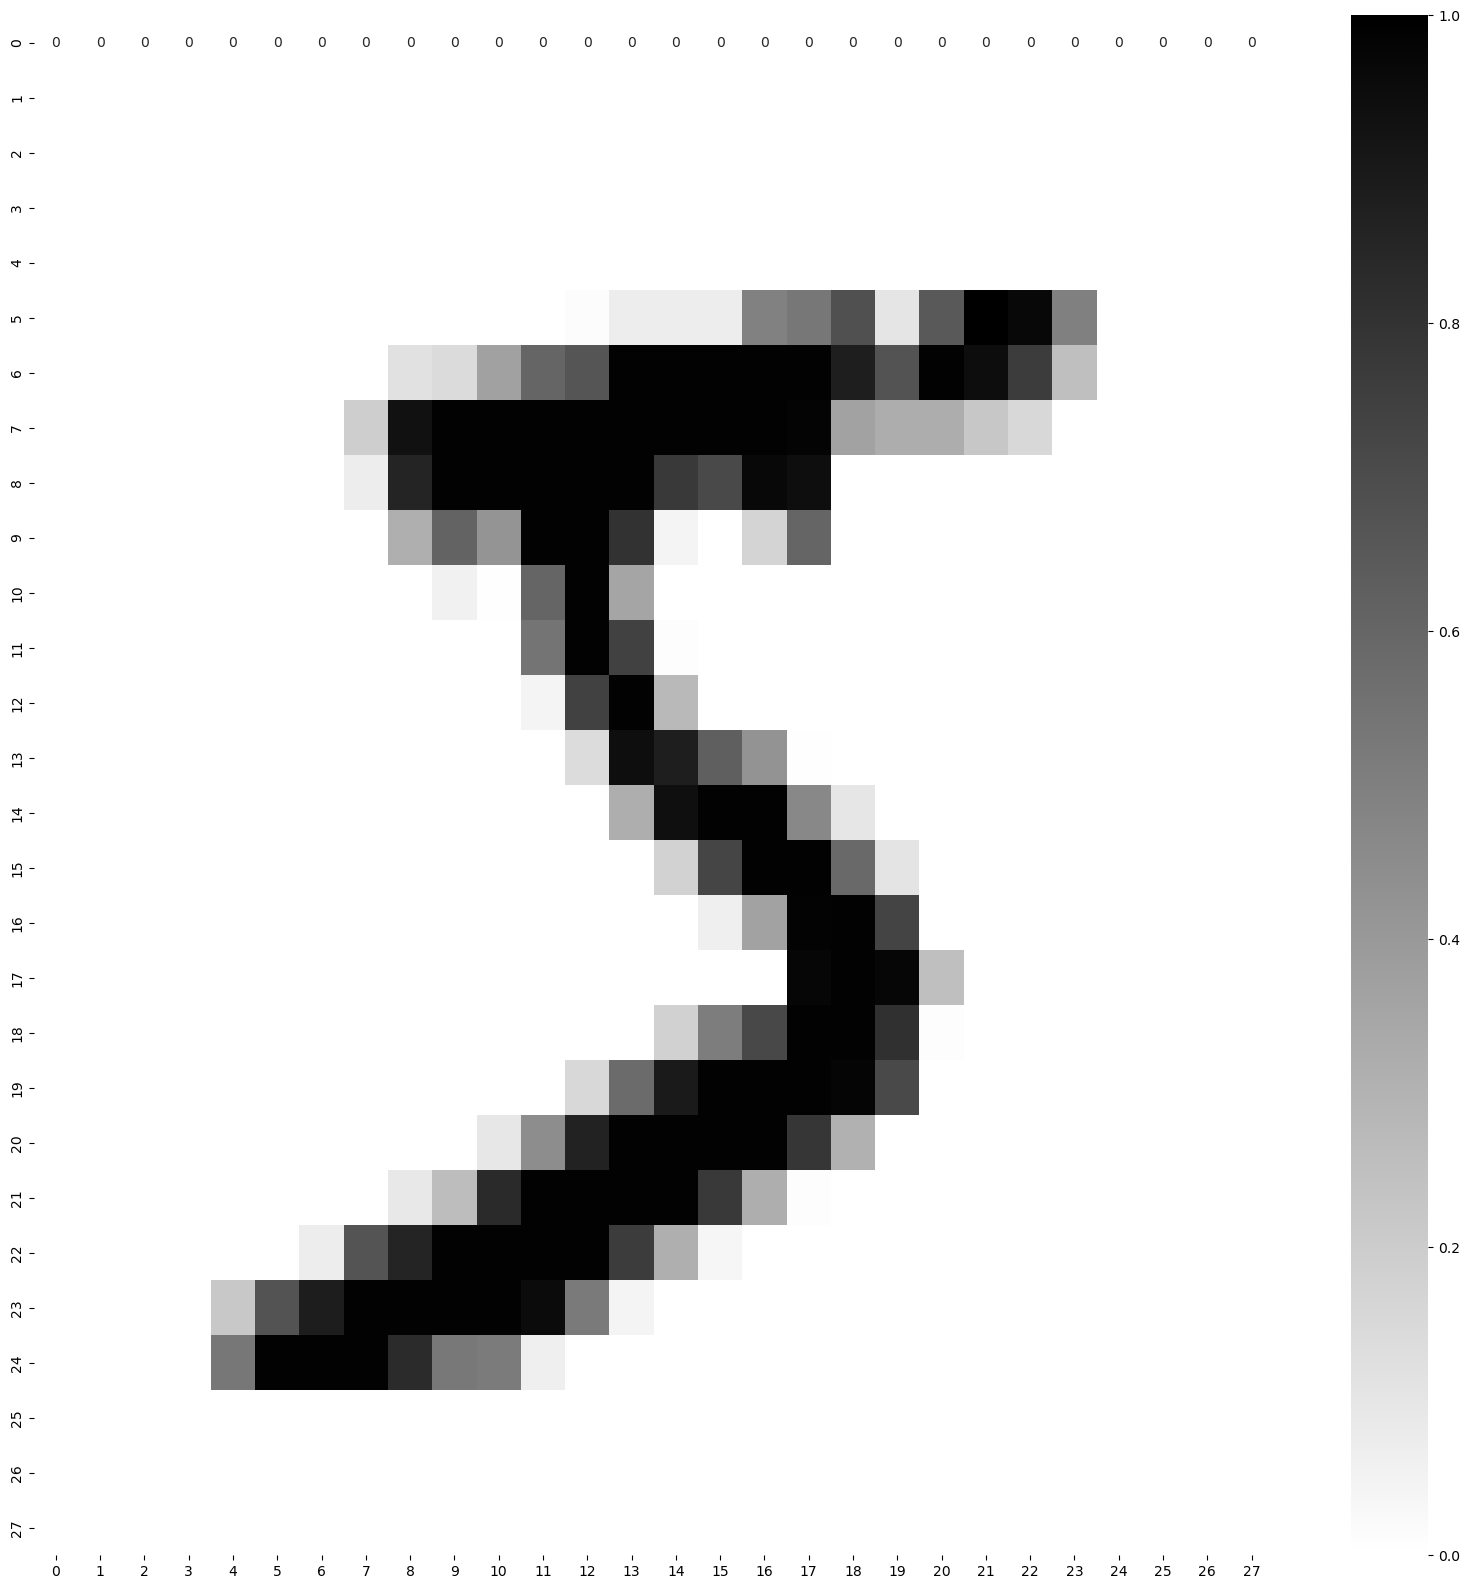

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap='binary')   

# each pixel can have a value in between 0 - (2^8-1)

'''
The pixel values of an image typically range from 0 to 255, where 0 represents black and 255 
represents white (for grayscale images). For color images, each channel (red, green, blue) also ranges from 0 to 255.

The expression img/255 is typically used to normalize the pixel values of an image to the 
range [0, 1]. This normalization is often performed before feeding the image data into machine 
learning models or when visualizing images with libraries like Seaborn or Matplotlib.

Normalizing the pixel values to the range [0, 1] can help improve the convergence of machine 
learning algorithms and ensures that the features have similar scales, which can lead to better
performance.

'''

In [10]:
## validation and training
X_valid , X_train = X_train_full[:5000]/255 , X_train_full[5000:] / 255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

X_test = X_test/255

In [17]:
CLASSES = 10  # number of classses in the classification task 
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28) , name='inputlayer' ),
    tf.keras.layers.Dense(300 , activation='relu' , name ='hiddenlayer1') ,
    tf.keras.layers.Dense(100 , activation='relu' , name='hiddenlayer2'),
    tf.keras.layers.Dense(CLASSES , activation='softmax' , name='outputlayer'),
] 



model_clf = tf.keras.models.Sequential(LAYERS) 
# Sequential : Starting from left and sequentially flows   (every previous layer is connected )
# Parallel : we can pass some of the the nuerons in the middle layers 



LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION , optimizer = OPTIMIZER , metrics=METRICS)



###### We can access the layers and get any of the info 
model_clf.layers
model_clf.layers[1].name
weights , biases = model_clf.layers[1].get_weights()
weights.shape
biases.shape
model_clf.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
##### Now lets fit the model 

EPOCHS = 30
VALIDATION = (X_valid , y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)

# It will run the first epoch on the train , test and immediately after that it will validate on the 
# validation set  ,  set is a seperate set to finally get an idea about the performance 

# Epoch 2/30   : batch size = 30  ->  divide entire training set / 30  , so in ecah epoch there wil
# be  that many steps (divide entire training set / 30 )

Epoch 1/30


1719/1719 [==============================] - 4s 2ms/step - loss: 0.6340 - accuracy: 0.8362 - val_loss: 0.3084 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.9164 - val_loss: 0.2385 - val_accuracy: 0.9326
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2350 - accuracy: 0.9318 - val_loss: 0.2051 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2000 - accuracy: 0.9423 - val_loss: 0.1790 - val_accuracy: 0.9532
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1745 - accuracy: 0.9492 - val_loss: 0.1582 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1548 - accuracy: 0.9551 - val_loss: 0.1486 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1386 - accuracy: 0.9599 - val_loss: 0.1348 - val_accurac

In [19]:
pd.DataFrame(history.history) 

,loss,accuracy,val_loss,val_accuracy
0,0.634047,0.836200,0.308385,0.9146
1,0.288596,0.916400,0.238528,0.9326
2,0.234999,0.931800,0.205094,0.9446
3,0.200020,0.942255,0.178965,0.9532
4,0.174505,0.949218,0.158169,0.9564
5,0.154821,0.955145,0.148592,0.9600
6,0.138553,0.959909,0.134802,0.9620
7,0.124843,0.964091,0.123189,0.9662
8,0.113963,0.966964,0.117473,0.9672
9,0.104017,0.970182,0.109732,0.9712


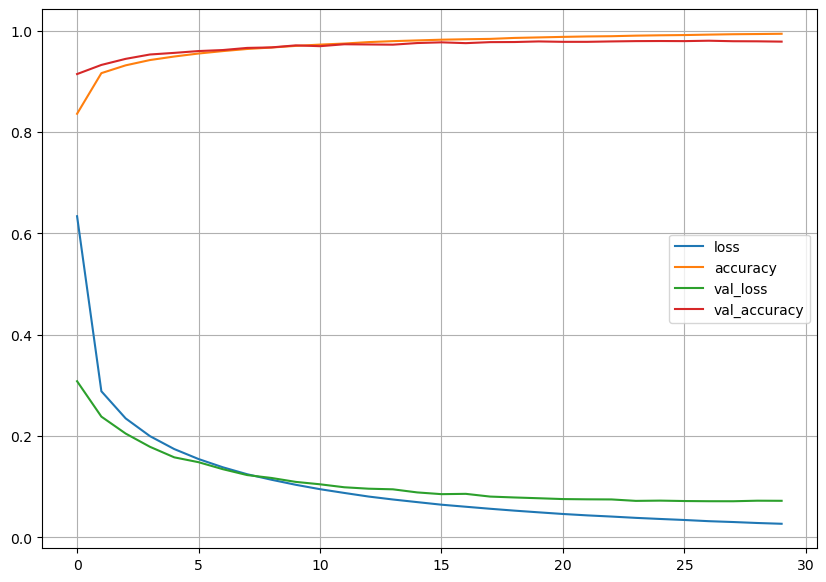

In [20]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [21]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9773


[0.07385706156492233, 0.9772999882698059]

In [23]:
import numpy as np

In [24]:
X_new = X_test[:3]
y_prob = model_clf.predict(X_new)
y_prob.round(3)

Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

1/1 [==============================] - 0s 21ms/step


array([7, 2, 1], dtype=int64)

In [28]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

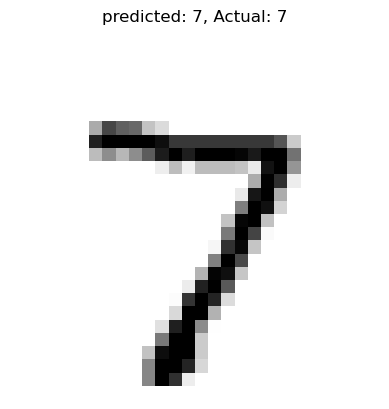

------------------------------------------------------------


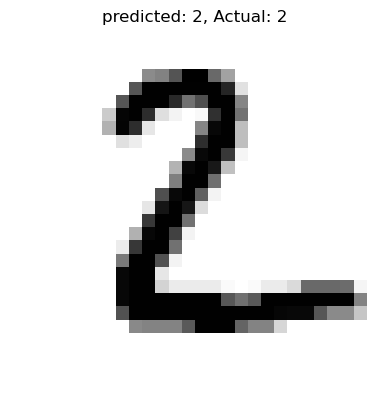

------------------------------------------------------------


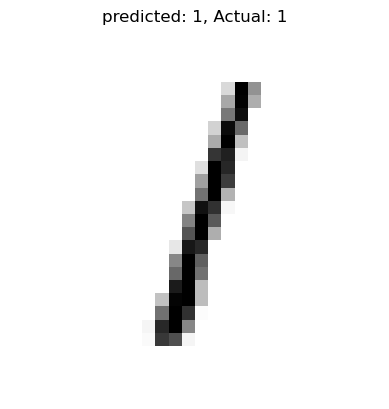

------------------------------------------------------------


In [25]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)

#  Weight Initialization 

In [26]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%load_ext tensorboard

In [29]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

<img src="Screenshot 2024-04-24 130151.jpg"  width="500"  />

In [32]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
LAYERS = [ tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),  ## Activation function for the above layer . Like this we can also 
    # seperately define the activation function 
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(), ## Activation function for the above layer 
    tf.keras.layers.Dense(10, activation="softmax")]


model = tf.keras.models.Sequential(LAYERS)


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Batch Normalization 

In [37]:
#  del model  

LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),   ### Applying the batch normalization for the above layer 
    tf.keras.layers.Dense(300, activation="relu"),  ### Activation fucntion for the above layer 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS_BN)

model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

'''

LAYERS_BN_BIAS_FALSE = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS_BN_BIAS_FALSE)


'''

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_7 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_8 (Bat  (None, 100)              

In [39]:
bn1 = model.layers[1]
for variable in bn1.variables:
  print(variable.name, variable.trainable)   # whether those are trainable 

batch_normalization_6/gamma:0 True
batch_normalization_6/beta:0 True
batch_normalization_6/moving_mean:0 False
batch_normalization_6/moving_variance:0 False


# Transfer Learning 

In [40]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


tf.random.set_seed(42)
np.random.seed(42)

LAYERS = [ tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")]


model = tf.keras.models.Sequential(LAYERS)




model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


model.summary()

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), verbose=2)

model.save("pretrained_mnist_model.h5")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 26661

C:\Users\Tharindu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Now lets use that model classify those handwritten digits into odd and even 

In [41]:
pretrained_mnist_model = tf.keras.models.load_model("pretrained_mnist_model.h5")
pretrained_mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 26661

In [42]:
for layer in pretrained_mnist_model.layers:
  print(f"{layer.name}: {layer.trainable}")

flatten_3: True
dense_9: True
leaky_re_lu: True
dense_10: True
leaky_re_lu_1: True
dense_11: True


In [43]:
for layer in pretrained_mnist_model.layers[:-1]: #leaves the last layer unfreezed =>last layer is trainable
  layer.trainable = False # freezing the layers from getting trained
  print(f"{layer.name}: {layer.trainable}")

flatten_3: False
dense_9: False
leaky_re_lu: False
dense_10: False
leaky_re_lu_1: False


In [49]:
lower_pretrained_layers = pretrained_mnist_model.layers[:-1]
new_model = tf.keras.models.Sequential(lower_pretrained_layers)

new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)




#### Not lets change ouy y_train and y_test to get even and odd labels 
def update_even_odd_labels(labels):
  for idx, label in enumerate(labels):
    labels[idx] = np.where(label % 2 == 0, 1, 0)
  return labels

y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

new_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


history = new_model.fit(X_train, y_train_bin, epochs=100,
                    validation_data=(X_valid, y_valid_bin) )

new_model.evaluate(X_test, y_test_bin)

Epoch 1/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4232 - accuracy: 0.8071 - val_loss: 0.3599 - val_accuracy: 0.8442
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3584 - accuracy: 0.8422 - val_loss: 0.3314 - val_accuracy: 0.8576
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3393 - accuracy: 0.8527 - val_loss: 0.3153 - val_accuracy: 0.8686
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3275 - accuracy: 0.8593 - val_loss: 0.3050 - val_accuracy: 0.8726
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3190 - accuracy: 0.8641 - val_loss: 0.2973 - val_accuracy: 0.8792
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3126 - accuracy: 0.8671 - val_loss: 0.2912 - val_accuracy: 0.8808
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.8699 - val_loss: 0.2864 - val_ac

[0.24534828960895538, 0.9010999798774719]

#  Regularization 

In [ ]:
import tensorflow as tf

LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

model.summary()



history = new_model.fit(X_train, y_train_bin, epochs=100,
                    validation_data=(X_valid, y_valid_bin) )

new_model.evaluate(X_test, y_test_bin)

# Dropout 

In [ ]:
import tensorflow as tf

LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.2),  # Adding dropout with a rate of 0.2
    #####  if we have 10 inputs 2 will be dropped as rate is 0.2 
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.2),  # Adding dropout with a rate of 0.2
    tf.keras.layers.Dense(10, activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


'''
tf.keras.layers.Dropout(0.2) layers are added after the activation layers (LeakyReLU). The 0.2 parameter specifies the fraction of 
input units to drop during training.
Dropout layers randomly drop a fraction of the input units during training, which helps prevent overfitting by forcing the network
to learn more robust features.
You can adjust the dropout rate as needed depending on your data and the level of regularization required.
A common range for the dropout rate is between 0.2 and 0.5, but you can experiment with different values to 
find what works best for your model and dataset.
'''

#  Keras Tuner (Hyper parameter tuning ) 

### When tuning an artificial neural network (ANN) using Keras Tuner, you can tune various hyperparameters to optimize the model's performance. Here are some of the key parameters that you can tune using Keras Tuner:

* Number of Hidden Layers: You can search for the optimal number of hidden layers in your neural network architecture.
* Number of Neurons per Hidden Layer: You can tune the number of neurons in each hidden layer to find the optimal balance between model capacity and complexity.
* Activation Functions: You can search for the best activation functions for each layer, such as ReLU, Leaky ReLU, ELU, etc.
* Learning Rate: You can tune the learning rate of the optimizer to control the step size during gradient descent.
* Optimizer: You can search for the optimal optimizer, such as Adam, RMSprop, SGD, etc.
* Batch Size: You can tune the batch size used during training, which determines the number of samples processed before updating the model's weights.
* Dropout Rate: If you're using dropout regularization, you can tune the dropout rate to prevent overfitting.
* Weight Initialization: You can search for the optimal weight initialization method, such as random initialization, He initialization, etc.
* Regularization Strength: You can tune the strength of regularization techniques like L1 or L2 regularization.
* Kernel Size and Stride: For convolutional neural networks (CNNs), you can tune the kernel size and stride of convolutional layers.
* Pooling Size and Stride: For CNNs, you can tune the size and stride of pooling layers, such as max pooling or average pooling.
* Padding: For CNNs, you can tune the padding type used in convolutional and pooling layers (e.g., 'valid' or 'same').
* Learning Rate Schedule: You can tune the learning rate schedule, such as exponential decay, time-based decay, or custom schedules.
* Early Stopping Criteria: You can tune the criteria for early stopping, such as monitoring validation loss or validation accuracy and the patience parameter.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch

# Define a Model-building Function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    
    # Tune the number of hidden layers and neurons per layer
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                    min_value=32,
                                    max_value=512,
                                    step=32),
                           activation=hp.Choice('activation_' + str(i),
                                               values=['relu', 'tanh', 'sigmoid', 'leaky_relu'])))
        # Tune dropout rate
        model.add(keras.layers.Dropout(rate=hp.Float('dropout_' + str(i),
                                                      min_value=0.0,
                                                      max_value=0.5,
                                                      step=0.1)))
    
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Define the Search Space
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld'
)

# Perform the Hyperparameter Search
tuner.search(train_images, train_labels,
             epochs=5,
             validation_data=(val_images, val_labels))

# Get the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and Train the Final Model with Best Hyperparameters
model = tuner.hypermodel.build(best_hps)
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

#  Callbacks  

* First create the following folder structure
<br/>
* src
    * utils
      * callbacks.py
      * common.py
      * data_mgmt.py
    * training.py
    * config.yaml
* requirements.txt
* config.yaml
  

In [ ]:
########## requirements.txt 
notebook
matplotlib
pandas
numpy
tensorflow
PyYAML
seaborn
## local package instalation
-e . ### <<< To install local packages defined in setup.py


###### config.yaml 
params:
  epochs: 1
  batch_size: 32
  num_classes: 10
  loss_function: sparse_categorical_crossentropy
  metrics: accuracy
  optimizer: SGD
  validation_datasize: 5000
  patience: 5
  restore_best_weights: True

artifacts:
  artifacts_dir: artifacts
  model_dir: model
  plots_dir: plots
  model_name: model.h5
  CHECKPOINT_DIR: checkpoints

logs:
  logs_dir: logs_dir
  general_logs: general_logs
  TENSORBOARD_ROOT_LOG_DIR: tensorboard_logs

In [ ]:
########################################################################################## 
######################################      common.py        ##############################
###########################################################################################

import yaml

def read_config(config_path):
    with open(config_path) as config_file:
        content = yaml.safe_load(config_file)

    return content




########################################################################################## 
######################################     data_mgmt.py        ###########################
##########################################################################################
import tensorflow as tf


def get_data(validation_datasize):
    mnist = tf.keras.datasets.mnist
    (X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

    # create a validation data set from the full training data 
    # Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
    X_valid, X_train = X_train_full[:validation_datasize] / 255., X_train_full[validation_datasize:] / 255.
    y_valid, y_train = y_train_full[:validation_datasize], y_train_full[validation_datasize:]

    # scale the test set as well
    X_test = X_test / 255.

    return (X_train, y_train), (X_valid, y_valid), (X_test, y_test)

In [ ]:
########################################################################################## 
######################################     callbacks.py        ###########################
##########################################################################################

import tensorflow as tf
import os
import numpy as np
import time

def get_timestamp(name):
    timestamp = time.asctime().replace(" ", "_").replace(":", "_")
    unique_name = f"{name}_at_{timestamp}"
    return unique_name

def get_callbacks(config, X_train):
    ##### first we need to set up a  directory to store logs and artifacts  
    logs = config["logs"]
    unique_dir_name = get_timestamp("tb_logs")
    TENSORBOARD_ROOT_LOG_DIR = os.path.join(logs["logs_dir"], logs["TENSORBOARD_ROOT_LOG_DIR"], unique_dir_name
    os.makedirs(TENSORBOARD_ROOT_LOG_DIR, exist_ok=True)                                        
    tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=TENSORBOARD_ROOT_LOG_DIR)



    '''
    file_writer = tf.summary.create_file_writer(logdir=TENSORBOARD_ROOT_LOG_DIR)
    with file_writer.as_default():
        images = np.reshape(X_train[10:30], (-1, 28, 28, 1)) ### <<< 20, 28, 28, 1
        tf.summary.image("20 handritten digit samples", images, max_outputs=25, step=0)
    '''


    ###### Now lets setup that early stopping process 
    params = config["params"]
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        patience=params["patience"],   # patience simply means how many epochs to look for 
        restore_best_weights=params["restore_best_weights"])

    ######## Now lets setup that creating checkpoints part 
    artifacts = config["artifacts"]
    CKPT_dir = os.path.join(artifacts["artifacts_dir"], artifacts["CHECKPOINT_DIR"])
    os.makedirs(CKPT_dir, exist_ok=True)
    CKPT_path = os.path.join(CKPT_dir, "model_ckpt.h5")
    checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)
    '''
    Checkpointing is a crucial technique in machine learning, particularly in training neural networks. It involves 
    periodically saving the model's current weights and state during training. Here's why checkpoints are important and what they do:
    Resuming Training: Checkpoints allow you to save the current state of your model during training. This means that if your 
    training process gets interrupted (due to system failure, manual interruption, etc.), you can resume training from the 
    last saved checkpoint rather than starting from scratch. This is especially valuable for long and resource-intensive training sessions.
    '''
    
    return [tensorboard_cb, early_stopping_cb, checkpointing_cb]







'''
### TensorBoard Callback (tf.keras.callbacks.TensorBoard):
       *This callback is used to log metrics and visualize the training process using TensorBoard, which is a
       visualization tool provided with TensorFlow. It specifies a directory (TENSORBOARD_ROOT_LOG_DIR) where the
       TensorBoard logs will be stored. This directory is created if it doesn't exist.Inside the callback, it also writes 
       images to the TensorBoard logs. In this case, it writes a batch of 20 handwritten digit samples as images.
       
       
### EarlyStopping Callback (tf.keras.callbacks.EarlyStopping):
       * This callback is used to stop training when a monitored metric has stopped improving.
It is commonly used to prevent overfitting by stopping training when the validation loss has stopped decreasing. 
It takes parameters like patience, which specifies the number of epochs to wait before stopping after no improvement,
and restore_best_weights, which specifies whether to restore the best weights when stopping.


###  ModelCheckpoint Callback (tf.keras.callbacks.ModelCheckpoint):
       * This callback is used to save the model's weights during training.
It saves the model's weights to a specified file (CKPT_path) whenever the validation loss decreases, or if save_best_only 
is set to True, only when the validation loss is the lowest seen so far.

'''

In [ ]:
#########################################################################
####################   training.py  #####################################
##########################################################################

import os
from utils.common import read_config
from utils.data_mgmt import get_data
from utils.model import create_model, save_model
from utils.callbacks import get_callbacks
import argparse

def training(config_path):
    config = read_config(config_path)
    
    validation_datasize = config["params"]["validation_datasize"]
    (X_train, y_train), (X_valid, y_valid), (X_test, y_test) = get_data(validation_datasize)


    
    LOSS_FUNCTION = config["params"]["loss_function"]
    OPTIMIZER = config["params"]["optimizer"]
    METRICS = config["params"]["metrics"]
    NUM_CLASSES = config["params"]["num_classes"]
    model = create_model(LOSS_FUNCTION, OPTIMIZER, METRICS, NUM_CLASSES)
    EPOCHS = config["params"]["epochs"]
    VALIDATION_SET = (X_valid, y_valid)

    # create callbacks
    CALLBACK_LIST = get_callbacks(config, X_train)
    history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, callbacks=CALLBACK_LIST)



    
    artifacts_dir = config["artifacts"]["artifacts_dir"]
    model_dir = config["artifacts"]["model_dir"]
    model_dir_path = os.path.join(artifacts_dir, model_dir)
    os.makedirs(model_dir_path, exist_ok=True)
    model_name = config["artifacts"]["model_name"]
    save_model(model, model_name, model_dir_path)





if __name__ == '__main__':
    args = argparse.ArgumentParser()

    args.add_argument("--config", "-c", default="config.yaml")

    parsed_args = args.parse_args()

    training(config_path=parsed_args.config)